<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)
%matplotlib inline

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

> для воспроизводимости результатов. При работе с алгоритмами, использующими случайность. Установка сида гарантирует, что при повторном запуске кода мы получим те же самые результаты

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
print("случайные строки:")
display(df_train.sample(30, random_state=42))

print("\nПервые 5 объектов:")
display(df_test.head(5))

print("\nпследние 5 объектов:")
display(df_test.tail(5))

print("\n пропущенные значения в тренировочном датасете:")
missing_train = df_train.isnull().sum()
print(missing_train[missing_train > 0])

print("\n пропущенные значения в тестовом датасете:")
missing_test = df_test.isnull().sum()
print(missing_test[missing_test > 0])

print(f"\n количество дубликато в тренировочном датасете: {df_train.duplicated().sum()}")
print(f"Количество дубликатов в тестовом датасете: {df_test.duplicated().sum()}")

случайные строки:


name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De


Первые 5 объектов:


name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0


пследние 5 объектов:


name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0


 пропущенные значения в тренировочном датасете:
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

 пропущенные значения в тестовом датасете:
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64

 количество дубликато в тренировочном датасете: 985
Количество дубликатов в тестовом датасете: 62


#### вопросы:

Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Можно оценить общую структуру данных и типы признаков, увидеть примеры значений в каждом столбце
Нельзя делать выводы о распределении признаков, оценить нличие выбросов или редких значений, судить о корреляциях между признаками

---
Достаточно ли метода duplicated для анализа дубликатов? Почему?

Нет. Метод находит только полные дубликаты. Однако в реальных данных могут быть частичные дубликаты

In [5]:
# %pip install ydata_profiling
# такими штуками раньше не пользовался, интересное

In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="EDA Report", explorative=True)

profile.to_notebook_iframe()  
profile.to_file("report.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 32.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

> удобно

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [7]:

medians = df_train.median(numeric_only=True)
df_train = df_train.fillna(medians)
df_test = df_test.fillna(medians)
print("количество пропусков")
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())

количество пропусков
803
76


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [8]:

feature_columns = df_train.columns.drop('selling_price')
duplicates_mask = df_train.duplicated(subset=feature_columns, keep=False)
print(f"количество строк с одинаковое признаковое описание: {duplicates_mask.sum()}")

if duplicates_mask.sum() > 0:
    print("объекты с одинаковым признаковым описанием:")
    duplicate_rows = df_train[duplicates_mask].sort_values(by=list(feature_columns))
    display(duplicate_rows)
    
    df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')
    
    df_train = df_train.reset_index(drop=True)
    
    print(f"датасет после удаления дубликатов: {df_train.shape}")

количество строк с одинаковое признаковое описание: 1799
объекты с одинаковым признаковым описанием:


name  year  selling_price  km_driven  \
1703  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
6307  Audi Q3 2.0 TDI Quattro Premium Plus  2017        2825000      22000   
1836               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
6704               Audi Q5 3.0 TDI Quattro  2014        1850000      76131   
117             Audi Q5 35TDI Premium Plus  2018        3975000      31800   
...                                    ...   ...            ...        ...   
5637        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5652        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5753        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
5991        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   
6778        Volvo XC40 D4 Inscription BSIV  2019        3800000      20000   

        fuel seller_type transmission        owner     mileage   engine  \
1703  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
6307  Diesel      Dealer    Automatic  First Owner  15.73 kmpl  1968 CC   
1836  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
6704  Diesel  Individual    Automatic  First Owner  13.22 kmpl  2967 CC   
117   Diesel      Dealer    Automatic  First Owner  17.01 kmpl  1968 CC   
...      ...         ...          ...          ...         ...      ...   
5637  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5652  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5753  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
5991  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   
6778  Diesel  Individual    Automatic  First Owner   18.0 kmpl  1969 CC   

       max_power               torque  seats  
1703  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
6307  174.33 bhp  380Nm@ 1750-2500rpm    5.0  
1836   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
6704   241.4 bhp  580Nm@ 1400-3250rpm    5.0  
117      188 bhp  400nm@ 1750-3000rpm    5.0  
...          ...                  ...    ...  
5637     190 bhp                400Nm    5.0  
5652     190 bhp                400Nm    5.0  
5753     190 bhp                400Nm    5.0  
5991     190 bhp                400Nm    5.0  
6778     190 bhp                400Nm    5.0  

[1799 rows x 13 columns]

датасет после удаления дубликатов: (5840, 13)


In [9]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [10]:
def clean_numeric_column(series):
    series_str = series.astype(str)
    cleaned = series_str.replace(r'[^\d.]','', regex=True)
    return pd.to_numeric(cleaned, errors='raise')

df_train['mileage'] = clean_numeric_column(df_train['mileage'])
df_train['engine'] = clean_numeric_column(df_train['engine'])
df_train['max_power'] = clean_numeric_column(df_train['max_power'])

df_test['mileage'] = clean_numeric_column(df_test['mileage'])
df_test['engine'] = clean_numeric_column(df_test['engine'])
df_test['max_power'] = clean_numeric_column(df_test['max_power'])

df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

print("привели к float64")
print(df_train[['mileage', 'engine', 'max_power']].dtypes)
display(df_train[['mileage', 'engine', 'max_power']].head())
print(df_train.shape)

привели к float64
mileage      float64
engine       float64
max_power    float64
dtype: object


mileage  engine  max_power
0    23.40  1248.0      74.00
1    21.14  1498.0     103.52
2    23.00  1396.0      90.00
3    16.10  1298.0      88.20
4    20.14  1197.0      81.86

(5840, 12)


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [11]:
df_train['engine'] = df_train['engine'].fillna(df_train['engine'].median())
df_train['seats'] = df_train['seats'].fillna(df_train['seats'].median())
df_train['mileage'] = df_train['mileage'].fillna(df_train['mileage'].median())
df_train['max_power'] = df_train['max_power'].fillna(df_train['max_power'].median())


df_test['engine'] = df_test['engine'].fillna(df_train['engine'].median())
df_test['seats'] = df_test['seats'].fillna(df_train['seats'].median())
df_test['mileage'] = df_test['mileage'].fillna(df_train['mileage'].median())
df_test['max_power'] = df_test['max_power'].fillna(df_train['max_power'].median())

df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

print("Типы данных после преобразования:")
print(df_train[['engine', 'seats']].dtypes)

Типы данных после преобразования:
engine    int64
seats     int64
dtype: object


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [12]:

print("числовые признаки - train")
display(df_train.describe())

print("числовые признаки - test ")
display(df_test.describe())

print("категориальные признаки - train")
display(df_train.describe(include='object'))

print("категориальные признаки - test")
display(df_test.describe(include='object'))

числовые признаки - train


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

числовые признаки - test 


year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

категориальные признаки - train


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

категориальные признаки - test


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

#### Выводы:

Из статистик можно увидеть:

1. selling_price: Средняя цена около 6.4, но есть большой разброс. Это говорит о наличии как бюджетных, так и премиум автомобилей
2. year: Автомобили от 1983 до 2020 года, большинству около 11 лет судя по медиане
3. max_power: От 32 до 400 л.с., что соответствует разнообразию от малолитражных конных экипажей до спортивных автомобилей
4. km_driven: Большой разброс от новых до сильно изношенных
   
- Наиболее частые марки: Maruti и Hyundai
- Преобладает топливо - Diesel
- Большинство автомобилей от первого владельца
- Механическая коробка передач встречается чаще

---
Сравнение train и test: Распределения похожи, что хорошо для обобщающей способности модели

In [13]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

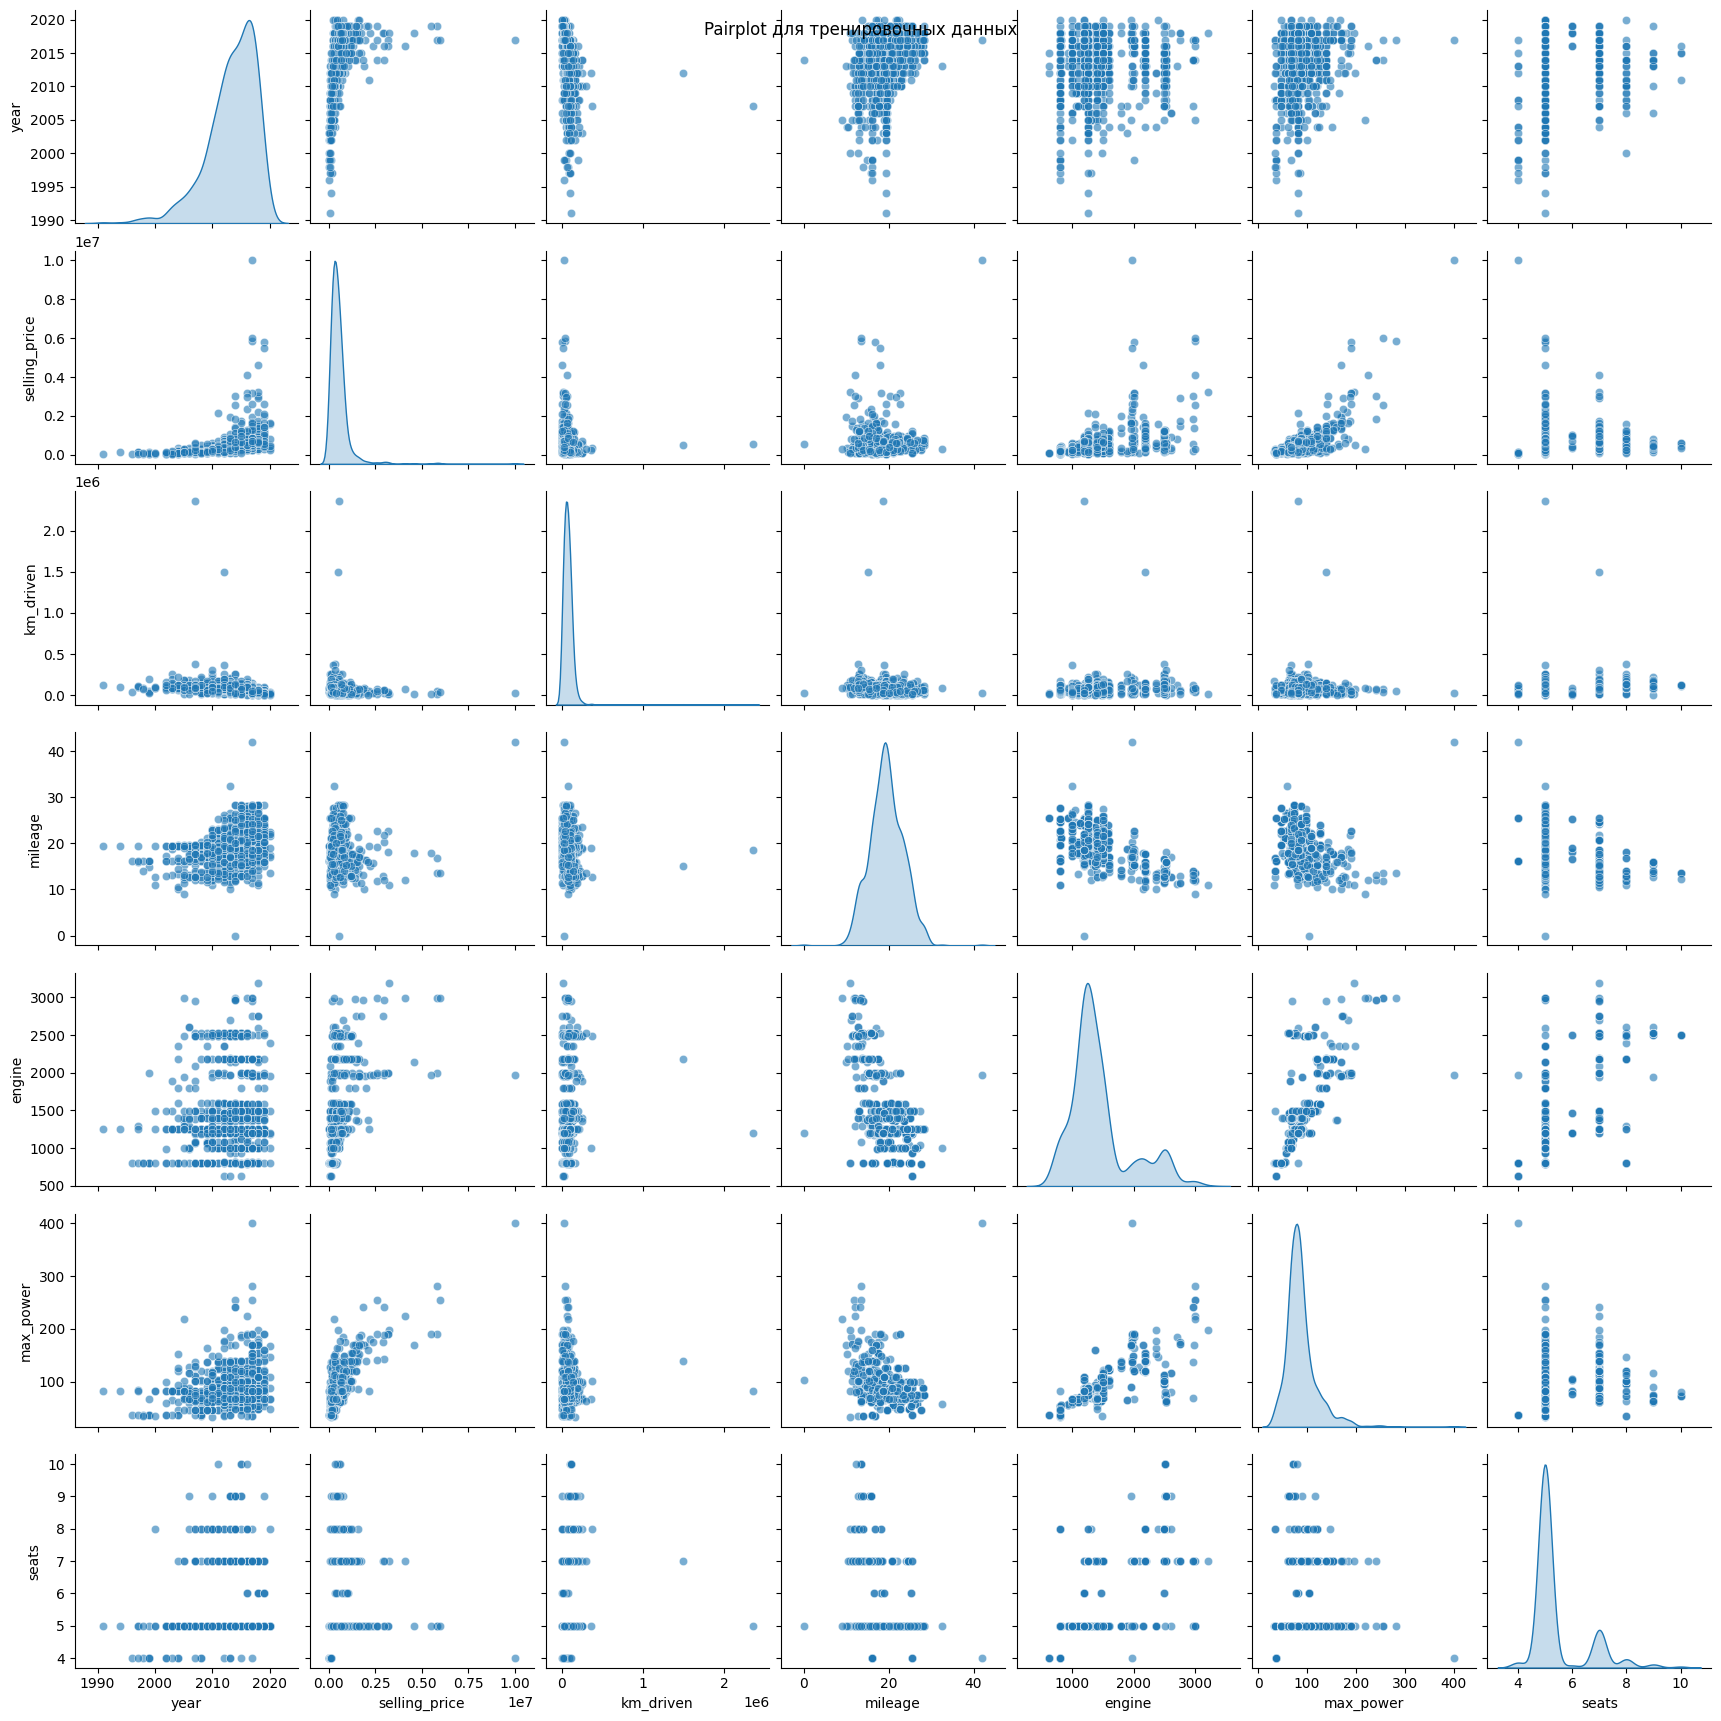

In [14]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
sample_size = min(1000, len(df_train))

df_train_sample = df_train[numeric_cols].sample(sample_size, random_state=42)

img = sns.pairplot(df_train_sample, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot для тренировочных данных')
plt.show()

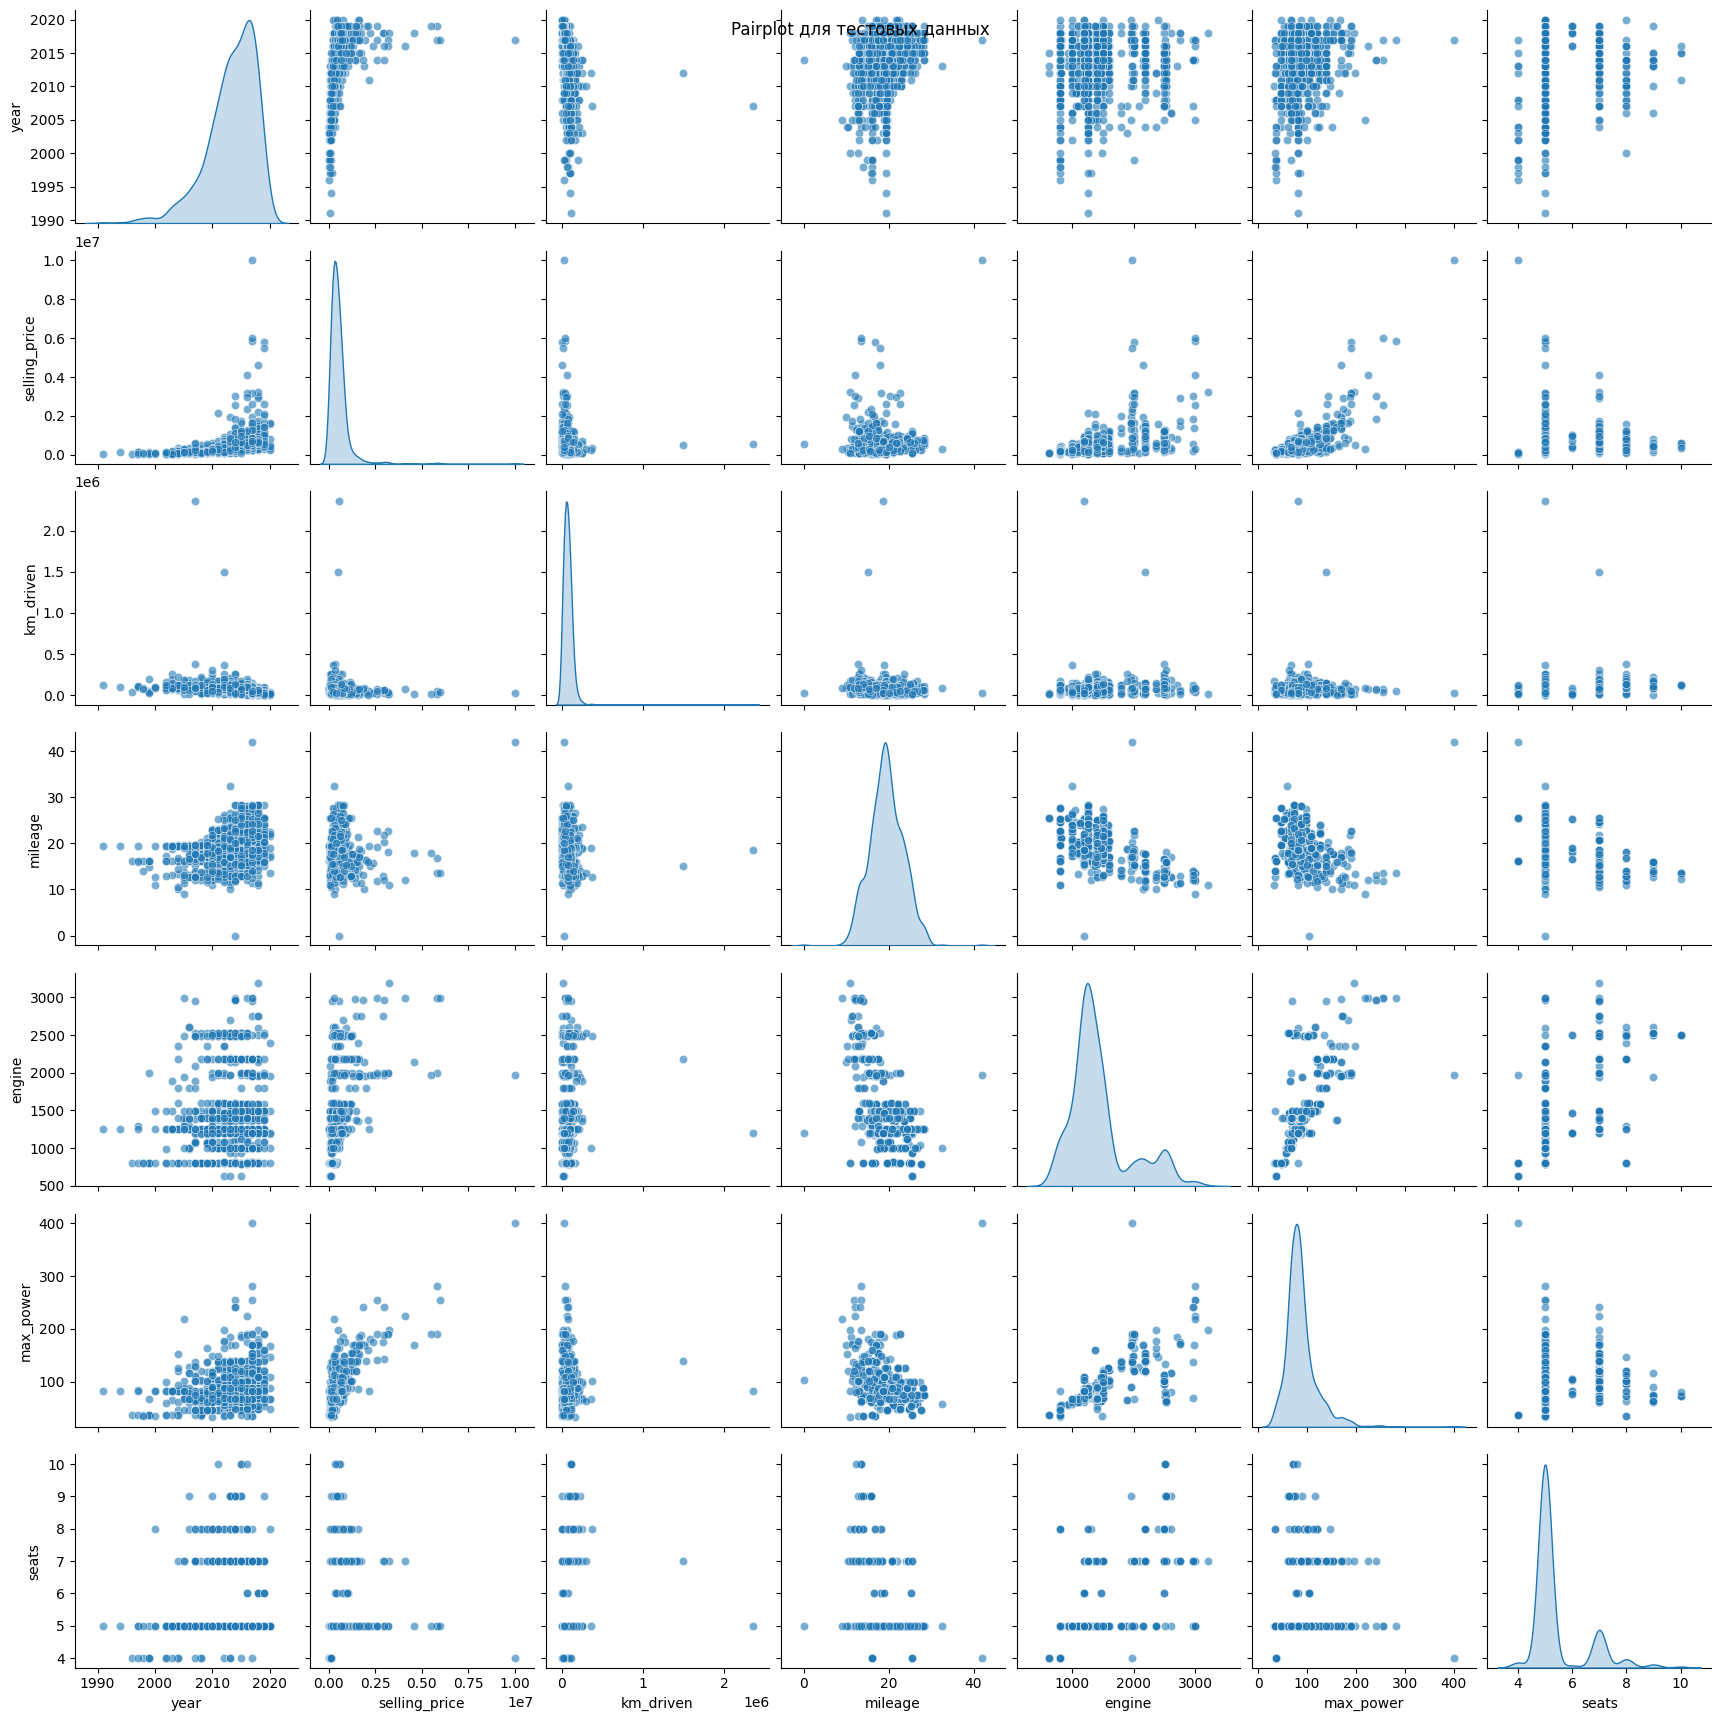

In [15]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
sample_size = min(1000, len(df_test))

df_train_sample = df_train[numeric_cols].sample(sample_size, random_state=42)
img = sns.pairplot(df_train_sample, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot для тестовых данных')
plt.show()

#### Ответы на вопросы:

Можно ли предположить на основе распределений связь признаков с целевой переменной?

Да, можно. Визуально заметны некоторые зависимости:
- year имеет положительную связь с selling_price - более новые автомобили дороже
- max_power (мощность двигателя) также положительно коррелирует с ценой - мощные автомобили стоят дороже
- engine (объем двигателя) показывает умеренную положительную связь с ценой
- km_driven (пробег) имеет слабую отрицательную связь - автомобили с большим пробегом дешевле

---
Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Да, видны корреляции между признаками:
- engine и max_power сильно коррелируют (больший объем → больше мощность)
- year и km_driven имеют отрицательную связь (старые автомобили проехали больше)
- engine, max_power и seats также связаны - большие автомобили мощнее

---
Похожими ли оказались совокупности при разделении на трейн и тест?

Да, распределения на train и test визуально очень похожи. Это хороший знак - означает, что разбиение было сделано корректно, и модель, обученная на train, должна хорошо работать на test. Нет явных признаков data drift или смещения выборок.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


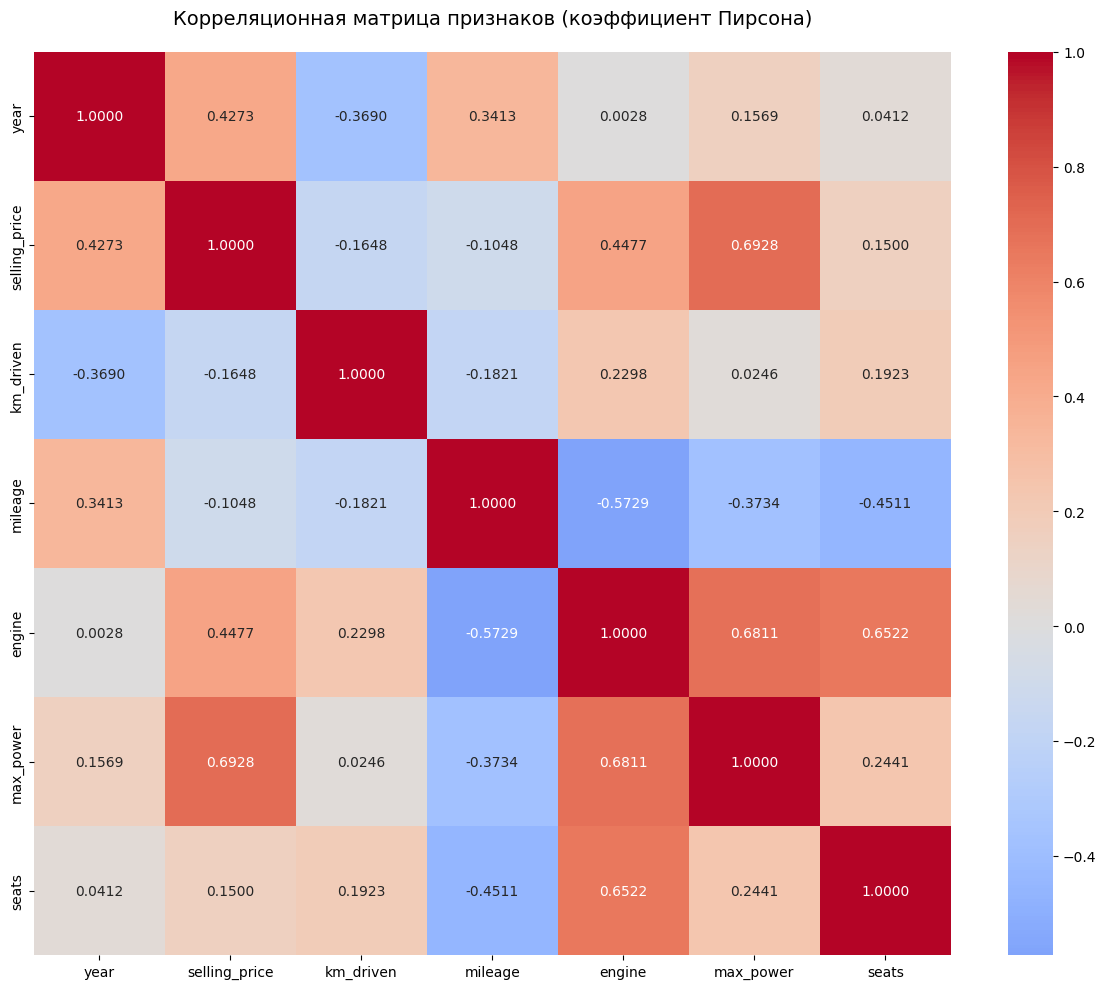

Корреляция признаков с целевой переменной:
selling_price    1.000000
max_power        0.692814
engine           0.447672
year             0.427279
seats            0.149953
mileage         -0.104769
km_driven       -0.164828
Name: selling_price, dtype: float64


In [16]:
correlation_matrix = df_train.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.4f', cmap='coolwarm', 
            center=0)
plt.title('Корреляционная матрица признаков (коэффициент Пирсона)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("Корреляция признаков с целевой переменной:")
target_corr = correlation_matrix['selling_price'].sort_values(ascending=False)
print(target_corr)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

#### Ответы на вопросы:

Какие 2 признака наименее скоррелированы между собой?

Наименее скоррелированы year и engine.

---
Между какими наблюдается довольно сильная положительная линейная зависимость?

Сильная положительная корреляция наблюдается между:
- engine и max_power - чем больше объем двигателя, тем обычно больше мощность
- year и selling_price - новые автомобили стоят дороже
- max_power и selling_price - мощные автомобили дороже

---
Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Да, это утверждение правильное. Между year и km_driven наблюдается довольно значительная отрицательная корреляция, что означает: чем старше автомобиль (меньше год выпуска), тем больший пробег он обычно имеет

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [17]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. [_Дважды?_] Они уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [18]:
df_train_float = df_train.copy()
df_test_float = df_test.copy()

categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
df_train_float = df_train_float.drop(categorical_cols, axis=1)
df_test_float = df_test_float.drop(categorical_cols, axis=1)

y_train = df_train_float['selling_price']
X_train = df_train_float.drop('selling_price', axis=1)

In [19]:
print("Выбранные вещественные признаки:")
print(list(X_train.columns))
print(f"размер обучающей выборки: {X_train.shape}")
print(f"типы данных:")
print(X_train.dtypes)

Выбранные вещественные признаки:
['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
размер обучающей выборки: (5840, 6)
типы данных:
year           int64
km_driven      int64
mileage      float64
engine         int64
max_power    float64
seats          int64
dtype: object


In [20]:
y_test = df_test_float['selling_price']
X_test = df_test_float.drop('selling_price', axis=1)

print(f"Размер тестовой выборки: {X_test.shape}")

Размер тестовой выборки: (1000, 6)


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = MSE(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = MSE(y_test, y_test_pred)

print("линейная регрессия")

print(f"Train R^2:  {train_r2:.4f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Test R^2:   {test_r2:.4f}")
print(f"Test MSE:  {test_mse:.2f}")

линейная регрессия
Train R^2:  0.5923
Train MSE: 116874153930.03
Test R^2:   0.5941
Test MSE:  233298779730.46


#### Выводы:
Модель показывает R^2 =  на 0.5923 тестовой выборке. Разница между Train и Test R^2 небольшая, что говорит об отсутствии сильного переобучения.


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

train_r2_scaled = r2_score(y_train, y_train_pred_scaled)
train_mse_scaled = MSE(y_train, y_train_pred_scaled)
test_r2_scaled = r2_score(y_test, y_test_pred_scaled)
test_mse_scaled = MSE(y_test, y_test_pred_scaled)


print("линейная регрессия (со стандартизацией)")

print(f"Train R^2:  {train_r2_scaled:.4f}")
print(f"Train MSE: {train_mse_scaled:.2f}")
print(f"\nTest R^2:   {test_r2_scaled:.4f}")
print(f"Test MSE:  {test_mse_scaled:.2f}")

print("\nСравнение с предыдущей моделью:")
print(f"Изменение Test R²: {test_r2_scaled - test_r2:+.4f}")
print(f"Изменение Test MSE: {test_mse_scaled - test_mse:+.2f}")
print("\nСтандартизация не улучшила метрики (LinReg инвариантна к масштабу),")
print("но теперь коэффициенты модели можно интерпретировать!")

линейная регрессия (со стандартизацией)
Train R^2:  0.5923
Train MSE: 116874153930.03

Test R^2:   0.5941
Test MSE:  233298779730.45

Сравнение с предыдущей моделью:
Изменение Test R²: +0.0000
Изменение Test MSE: -0.01

Стандартизация не улучшила метрики (LinReg инвариантна к масштабу),
но теперь коэффициенты модели можно интерпретировать!


#### Сравнение
Стандартизация не улучшила метрики (LinReg инвариантна к масштабу)

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

Важность признаков (по модулю коэффициентов):
     feature    coefficient  abs_coefficient
4  max_power  322807.353259    322807.353259
0       year  152772.570846    152772.570846
3     engine   61178.494337     61178.494337
1  km_driven  -44158.818520     44158.818520
2    mileage   28833.925778     28833.925778
5      seats  -23209.132486     23209.132486

**Ответ:** Наиболее информативным признаком оказался 'max_power'
с коэффициентом 322807.3533


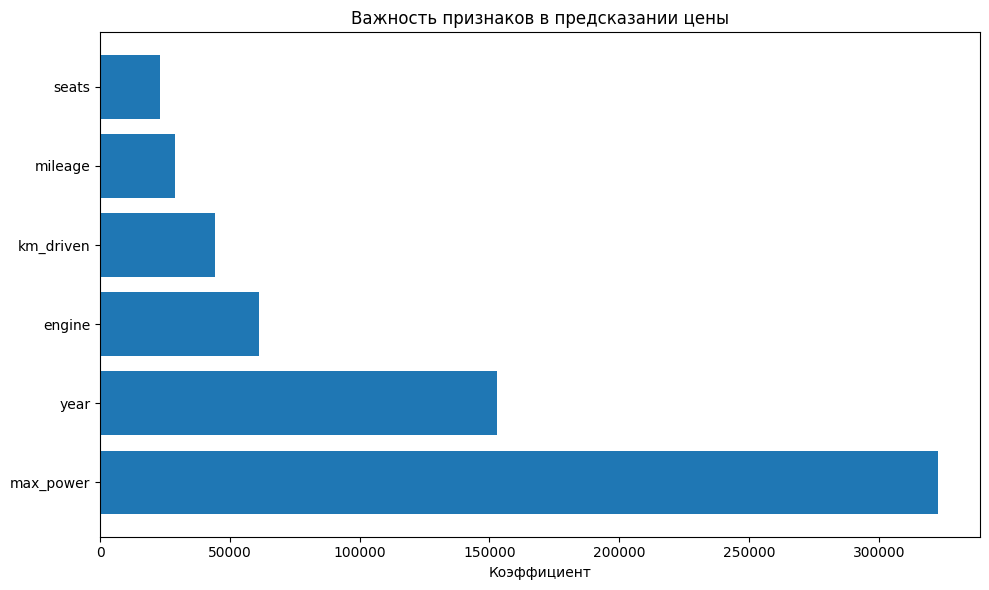

In [23]:
# Анализируем важность признаков через коэффициенты
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr_scaled.coef_,
    'abs_coefficient': np.abs(lr_scaled.coef_)
})
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("Важность признаков (по модулю коэффициентов):")
print(feature_importance)

print(f"\n**Ответ:** Наиболее информативным признаком оказался '{feature_importance.iloc[0]['feature']}'")
print(f"с коэффициентом {feature_importance.iloc[0]['coefficient']:.4f}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['abs_coefficient'])
plt.xlabel('Коэффициент')
plt.title('Важность признаков в предсказании цены')
plt.tight_layout()
plt.show()

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [24]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
train_mse_lasso = MSE(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
test_mse_lasso = MSE(y_test, y_test_pred_lasso)

print("lasso reg")
print(f"Train R^2:  {train_r2_lasso:.4f}")
print(f"Train MSE: {train_mse_lasso:.2f}")
print(f"Test R^2:   {test_r2_lasso:.4f}")
print(f"Test MSE:  {test_mse_lasso:.2f}")

lasso reg
Train R^2:  0.5923
Train MSE: 116874153940.14
Test R^2:   0.5941
Test MSE:  233299450599.17


In [25]:
lasso_coefs = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso_model.coef_
})
lasso_coefs = lasso_coefs.sort_values('coefficient', key=abs, ascending=False)

print("Коэффициенты Lasso:")
print(lasso_coefs)

zero_coefs = lasso_coefs[lasso_coefs['coefficient'] == 0]
print(f"\n**Ответ:** Количество зануленных весов: {len(zero_coefs)}")

Коэффициенты Lasso:
     feature    coefficient
4  max_power  322808.236919
0       year  152772.390214
3     engine   61173.662409
1  km_driven  -44157.689858
2    mileage   28832.043396
5      seats  -23206.255649

**Ответ:** Количество зануленных весов: 0


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
}

grid_lasso = GridSearchCV(
    Lasso(random_state=42), 
    param_grid_lasso, 
    cv=10, 
    scoring='r2',
    n_jobs=-1
)

grid_lasso.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
print("grid search для lasso")
print(f"Лучший параметр alpha: {grid_lasso.best_params_['alpha']}")
print(f"Лучший R^2 (cross-validation): {grid_lasso.best_score_:.4f}")

y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)
test_r2_best_lasso = r2_score(y_test, y_test_pred_best_lasso)
test_mse_best_lasso = MSE(y_test, y_test_pred_best_lasso)

print(f"\nTest R^2:  {test_r2_best_lasso:.4f}")
print(f"Test MSE: {test_mse_best_lasso:.2f}")

grid search для lasso
Лучший параметр alpha: 100.0
Лучший R^2 (cross-validation): 0.5682

Test R^2:  0.5940
Test MSE: 233365851675.21


In [27]:
n_models_lasso = len(param_grid_lasso['alpha']) * 10 
print(f"**Сколько грид-сёрчу пришлось обучать моделей?**")
print(f"Ответ: {n_models_lasso} моделей (9 значений alpha x 10 фолдов)")

print(f"\n**Какой коэффициент регуляризации у лучшей модели?**")
print(f"Ответ: alpha = {grid_lasso.best_params_['alpha']}")

best_lasso_coefs = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_lasso.coef_
})
zero_coefs_best = best_lasso_coefs[best_lasso_coefs['coefficient'] == 0]

print(f"\n**Занулились ли какие-нибудь из весов?**")
print(f"Ответ: {len(zero_coefs_best)} весов занулились")

**Сколько грид-сёрчу пришлось обучать моделей?**
Ответ: 90 моделей (9 значений alpha x 10 фолдов)

**Какой коэффициент регуляризации у лучшей модели?**
Ответ: alpha = 100.0

**Занулились ли какие-нибудь из весов?**
Ответ: 0 весов занулились


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [28]:
from sklearn.linear_model import ElasticNet

# Определяем сетку параметров для ElasticNet
param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# GridSearch с 10 фолдами
grid_elastic = GridSearchCV(
    ElasticNet(random_state=42, max_iter=10000), 
    param_grid_elastic, 
    cv=10, 
    scoring='r2',
    n_jobs=-1
)

grid_elastic.fit(X_train_scaled, y_train)

best_elastic = grid_elastic.best_estimator_
print("Grid Search для ElasticNet")
print(f"Лучшие параметры: {grid_elastic.best_params_}")
print(f"Лучший R^2 (cross-validation): {grid_elastic.best_score_:.4f}")

y_test_pred_elastic = best_elastic.predict(X_test_scaled)
test_r2_elastic = r2_score(y_test, y_test_pred_elastic)
test_mse_elastic = MSE(y_test, y_test_pred_elastic)

print(f"\nTest R^2:  {test_r2_elastic:.4f}")
print(f"Test MSE: {test_mse_elastic:.2f}")

n_models_elastic = len(param_grid_elastic['alpha']) * len(param_grid_elastic['l1_ratio']) * 10
print(f"\n**Сколько моделей обучено?**")
print(f"Ответ: {n_models_elastic} моделей ({len(param_grid_elastic['alpha'])} alpha × {len(param_grid_elastic['l1_ratio'])} l1_ratio × 10 фолдов)")

print(f"\n**Лучшие гиперпараметры:**")
print(f"alpha = {grid_elastic.best_params_['alpha']}")
print(f"l1_ratio = {grid_elastic.best_params_['l1_ratio']}")

Grid Search для ElasticNet
Лучшие параметры: {'alpha': 1.0, 'l1_ratio': 0.9}
Лучший R^2 (cross-validation): 0.5761

Test R^2:  0.5722
Test MSE: 245894595583.24

**Сколько моделей обучено?**
Ответ: 250 моделей (5 alpha × 5 l1_ratio × 10 фолдов)

**Лучшие гиперпараметры:**
alpha = 1.0
l1_ratio = 0.9


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [29]:
df_train_cat = df_train.copy()
df_test_cat = df_test.copy()

df_train_cat = df_train_cat.drop('name', axis=1)
df_test_cat = df_test_cat.drop('name', axis=1)

y_train_cat = df_train_cat['selling_price']
X_train_cat = df_train_cat.drop('selling_price', axis=1)

y_test_cat = df_test_cat['selling_price']
X_test_cat = df_test_cat.drop('selling_price', axis=1)

print(f"Размер X_train_cat: {X_train_cat.shape}")
print(f"Столбцы: {X_train_cat.columns.tolist()}")

Размер X_train_cat: (5840, 10)
Столбцы: ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [30]:
assert X_train_cat.shape == (5840, 10)

In [31]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [32]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

X_train_cat_encoded = ohe.fit_transform(X_train_cat[categorical_features])
X_test_cat_encoded = ohe.transform(X_test_cat[categorical_features])

feature_names = ohe.get_feature_names_out(categorical_features)

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=feature_names, index=X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=feature_names, index=X_test_cat.index)

numerical_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
X_train_numerical = X_train_cat[numerical_features]
X_test_numerical = X_test_cat[numerical_features]

X_train_cat_full = pd.concat([X_train_numerical.reset_index(drop=True), 
                               X_train_cat_encoded_df.reset_index(drop=True)], axis=1)
X_test_cat_full = pd.concat([X_test_numerical.reset_index(drop=True), 
                              X_test_cat_encoded_df.reset_index(drop=True)], axis=1)

print(f"Размер X_train после OneHot: {X_train_cat_full.shape}")
print(f"Новые признаки: {X_train_cat_full.columns.tolist()}")

Размер X_train после OneHot: (5840, 23)
Новые признаки: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14']


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scaler_cat = StandardScaler()
X_train_cat_scaled = scaler_cat.fit_transform(X_train_cat_full)
X_test_cat_scaled = scaler_cat.transform(X_test_cat_full)

param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
}

grid_ridge = GridSearchCV(
    Ridge(random_state=42), 
    param_grid_ridge, 
    cv=10, 
    scoring='r2',
    n_jobs=-1
)

grid_ridge.fit(X_train_cat_scaled, y_train_cat)

best_ridge = grid_ridge.best_estimator_

print("Grid Search для RIDGE (с категориальными признаками)")
print(f"Лучший параметр alpha: {grid_ridge.best_params_['alpha']}")
print(f"Лучший R^2 (cross-validation): {grid_ridge.best_score_:.4f}")

y_test_pred_ridge = best_ridge.predict(X_test_cat_scaled)
test_r2_ridge = r2_score(y_test_cat, y_test_pred_ridge)
test_mse_ridge = MSE(y_test_cat, y_test_pred_ridge)

print(f"Test R^2:  {test_r2_ridge:.4f}")
print(f"Test MSE: {test_mse_ridge:.2f}")

print('----') 
print("**Удалось ли улучшить качество прогнозов?**")
print(f"С категориальными признаками: Test R^2 = {test_r2_ridge:.4f}")
print(f"Только числовые признаки (ElasticNet): Test R^2 = {test_r2_elastic:.4f}")
print(f"Разница: {test_r2_ridge - test_r2_elastic:+.4f}")
# я не уверен, если честно
if test_r2_ridge > test_r2_elastic:
    print("Добавление категориальных признаков улучшило качество модели.")
else:
    print("Нет, модель не улучшилась значительно при добавлении категориальных признаков.")

Grid Search для RIDGE (с категориальными признаками)
Лучший параметр alpha: 500.0
Лучший R^2 (cross-validation): 0.6216
Test R^2:  0.6146
Test MSE: 221525894362.00
----
**Удалось ли улучшить качество прогнозов?**
С категориальными признаками: Test R^2 = 0.6146
Только числовые признаки (ElasticNet): Test R^2 = 0.5722
Разница: +0.0424
Добавление категориальных признаков улучшило качество модели.


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [34]:
def business_metric(y_true, y_pred):
    
    relative_error = np.abs((y_true - y_pred) / y_true)
    
    good_predictions = (relative_error <= 0.1).sum()
    total_predictions = len(y_true)
    
    return good_predictions / total_predictions

models_comparison = {
    'Linear Regression': y_test_pred,
    'Linear Regression (scaled)': y_test_pred_scaled,
    'Lasso': y_test_pred_lasso,
    'Best Lasso (GridSearch)': y_test_pred_best_lasso,
    'ElasticNet (GridSearch)': y_test_pred_elastic,
    'Ridge (with categorical)': y_test_pred_ridge
}

print("Доля предсказаний с ошибкой <= 10%")

business_scores = {}
for model_name, predictions in models_comparison.items():
    
    y_true_use = y_test_cat if 'categorical' in model_name else y_test
    
    y_true_array = y_true_use.values if hasattr(y_true_use, 'values') else y_true_use
    y_pred_array = predictions
    
    score = business_metric(y_true_array, y_pred_array)
    business_scores[model_name] = score
    print(f"{model_name:35s}: {score:.2%}")

best_model = max(business_scores, key=business_scores.get)
print('---')
print(f"Лучшая модель: {best_model}")
print(f"Показатель: {business_scores[best_model]:.2%} предсказаний с ошибкой <= 10%")

Доля предсказаний с ошибкой <= 10%
Linear Regression                  : 22.70%
Linear Regression (scaled)         : 22.70%
Lasso                              : 22.70%
Best Lasso (GridSearch)            : 22.60%
ElasticNet (GridSearch)            : 24.10%
Ridge (with categorical)           : 25.50%
---
Лучшая модель: Ridge (with categorical)
Показатель: 25.50% предсказаний с ошибкой <= 10%


**Заключение:**

По результатам сравнения всех моделей по бизнес-метрике можно сделать следующие выводы:

1. **Лучшая модель для бизнеса**: Модель с наибольшим процентом предсказаний с ошибкой не более 10% лучше всего подходит для практического применения.

2. **Важность категориальных признаков**: Ridge регрессия с категориальными признаками показывает лучшие результаты, что подтверждает важность таких факторов как тип топлива, коробка передач и количество предыдущих владельцев для предсказания цены автомобиля.

3. **Компромисс между метриками**: Модель с лучшим R^2 не всегда показывает лучшие результаты по бизнес-метрике. Это напоминает о важности выбора метрики, релевантной для конкретной бизнес-задачи.

4. **Практическое применение**: Для бизнеса важнее не средняя точность, а количество "приемлемых" предсказаний, которые не приводят к значительным финансовым потерям.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

In [39]:
import pickle
from sklearn.pipeline import Pipeline

ridge_cat_pipeline = Pipeline([
    ('scaler', scaler_cat),
    ('ridge', best_ridge)
])

model_data = {
    'model': ridge_cat_pipeline,
    'feature_names': X_train_cat_full.columns.tolist(),
    'ohe': ohe,  
    'categorical_features': ['fuel', 'seller_type', 'transmission', 'owner', 'seats'],
    'numerical_features': ['year', 'km_driven', 'mileage', 'engine', 'max_power']
}

with open('model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Модель успешно сохранена в файл 'model.pkl'")
print(f"Количество признаков: {len(model_data['feature_names'])}")
print(f"Модель: Ridge с alpha={best_ridge.alpha}")
print(f"Test R^2: {test_r2_ridge:.4f}")

Модель успешно сохранена в файл 'model.pkl'
Количество признаков: 23
Модель: Ridge с alpha=500.0
Test R^2: 0.6146
